In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/Zip_Zhvi_SingleFamilyResidence.csv', encoding='latin')

In [0]:
CA = df[df.State == 'CA']

In [0]:
# CA.CountyName.value_counts()

LA = CA[CA.CountyName == 'Los Angeles County']

In [0]:
LA.City.value_counts()

Los Angeles           100
Long Beach             11
Glendale                9
Santa Clarita           8
Whittier                6
                     ... 
Pearblossom             1
Maywood                 1
West Puente Valley      1
Lake Hughes             1
Walnut                  1
Name: City, Length: 95, dtype: int64

In [0]:
glendale = LA[LA.City == 'Glendale']

In [0]:
glendale.RegionName.value_counts()

91214    1
91208    1
91207    1
91206    1
91205    1
91204    1
91203    1
91202    1
91201    1
Name: RegionName, dtype: int64

In [0]:
# LA.groupby('City')[].mean()
mine = LA[LA.RegionName == 90039]

In [0]:
df = mine.copy()

In [0]:
df_t = df.loc[:, '1996-04'::].T

In [0]:
df_t.columns = ['average home price']

In [0]:
from matplotlib import pyplot

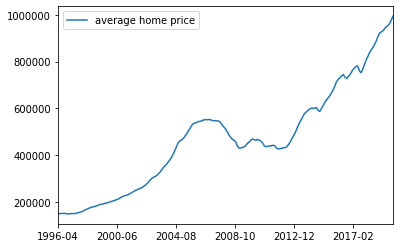

In [30]:
df_t.plot()

In [0]:
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

In [0]:
df = df_t.copy()

In [35]:
df.reset_index(inplace=True)
df.columns = ['ds','y']
df.head()

,ds,y
0,1996-04,150196.0
1,1996-05,149395.0
2,1996-06,149480.0
3,1996-07,149482.0
4,1996-08,150127.0


In [36]:
len(df)

285

In [0]:
prediction_size = 57
train_df = df[:-prediction_size]

In [40]:
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,130897.546151,113024.665883,152825.785766,130897.546151,130897.546151,1730.760134,1730.760134,1730.760134,1730.760134,1730.760134,1730.760134,0.0,0.0,0.0,132628.306286
1,1996-05-01,132431.509502,115510.906252,152274.697380,132431.509502,132431.509502,2201.695917,2201.695917,2201.695917,2201.695917,2201.695917,2201.695917,0.0,0.0,0.0,134633.205420
2,1996-06-01,134016.604965,116514.780358,154486.349493,134016.604965,134016.604965,2401.620061,2401.620061,2401.620061,2401.620061,2401.620061,2401.620061,0.0,0.0,0.0,136418.225026
3,1996-07-01,135550.568316,119411.056831,156749.348450,135550.568316,135550.568316,2347.490646,2347.490646,2347.490646,2347.490646,2347.490646,2347.490646,0.0,0.0,0.0,137898.058962
4,1996-08-01,137135.663779,120136.860500,159947.102001,137135.663779,137135.663779,2516.391813,2516.391813,2516.391813,2516.391813,2516.391813,2516.391813,0.0,0.0,0.0,139652.055591


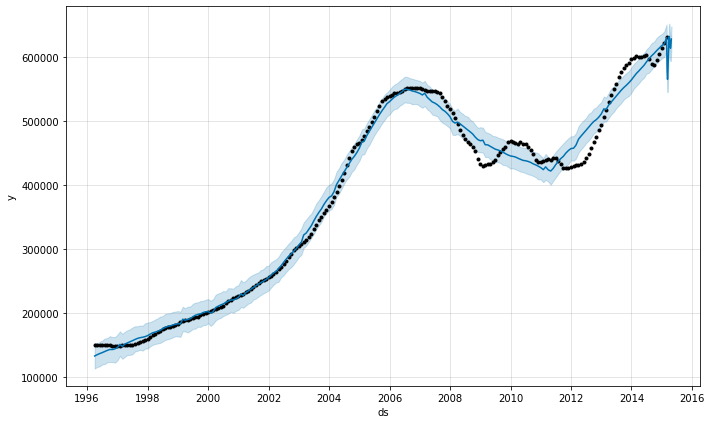

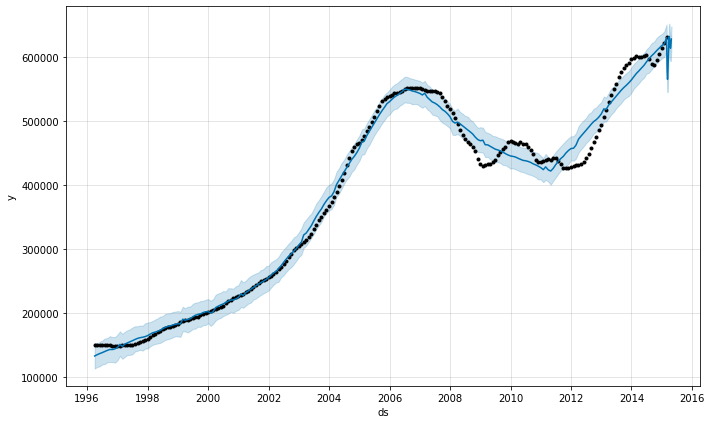

In [41]:
m.plot(forecast)

In [42]:
prediction_size = 100
train_df = df[:-prediction_size]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,140781.564177,129320.114741,151623.315018,140781.564177,140781.564177,-480.927462,-480.927462,-480.927462,-480.927462,-480.927462,-480.927462,0.0,0.0,0.0,140300.636714
1,1996-05-01,141806.742024,129034.116199,151381.936833,141806.742024,141806.742024,-1383.892694,-1383.892694,-1383.892694,-1383.892694,-1383.892694,-1383.892694,0.0,0.0,0.0,140422.849330
2,1996-06-01,142866.092466,129758.046195,152143.101187,142866.092466,142866.092466,-1682.986811,-1682.986811,-1682.986811,-1682.986811,-1682.986811,-1682.986811,0.0,0.0,0.0,141183.105655
3,1996-07-01,143891.270314,131118.460903,154927.859379,143891.270314,143891.270314,-1090.764273,-1090.764273,-1090.764273,-1090.764273,-1090.764273,-1090.764273,0.0,0.0,0.0,142800.506040
4,1996-08-01,144950.620756,134530.192595,156633.583060,144950.620756,144950.620756,294.139961,294.139961,294.139961,294.139961,294.139961,294.139961,0.0,0.0,0.0,145244.760716


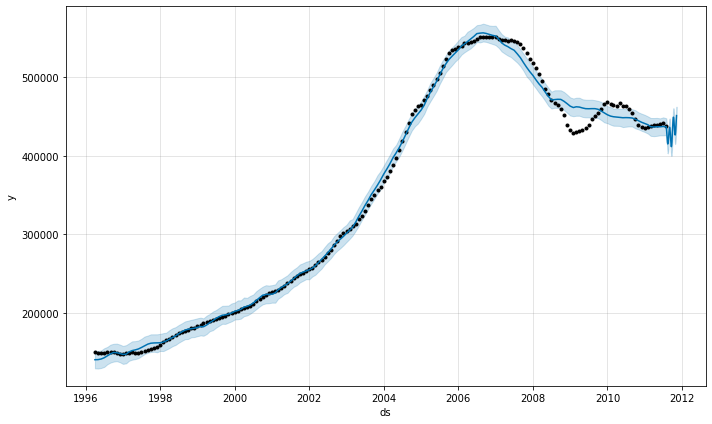

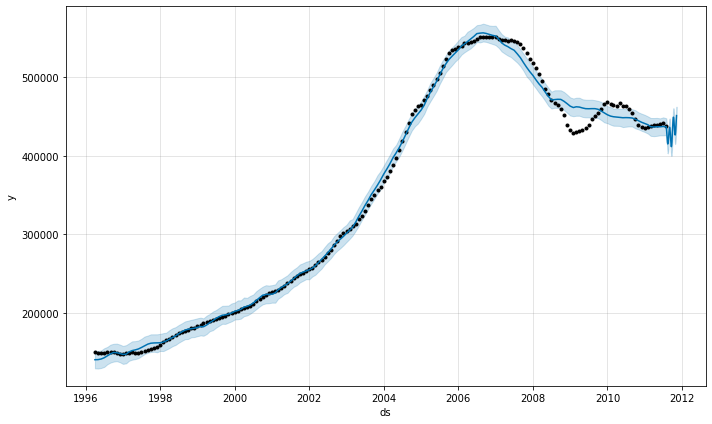

In [43]:
m.plot(forecast)

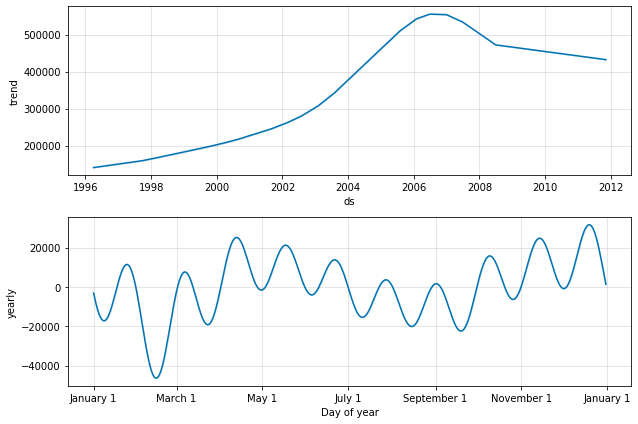

In [44]:
fig2 = m.plot_components(forecast)

In [45]:
prediction_size = 12
train_df = df[:-prediction_size]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,136649.904231,121998.601579,155873.117863,136649.904231,136649.904231,1342.999843,1342.999843,1342.999843,1342.999843,1342.999843,1342.999843,0.0,0.0,0.0,137992.904074
1,1996-05-01,138000.942270,121840.105213,155296.590817,138000.942270,138000.942270,454.221789,454.221789,454.221789,454.221789,454.221789,454.221789,0.0,0.0,0.0,138455.164059
2,1996-06-01,139397.014911,122461.299602,154574.133405,139397.014911,139397.014911,161.879191,161.879191,161.879191,161.879191,161.879191,161.879191,0.0,0.0,0.0,139558.894102
3,1996-07-01,140748.052950,124365.838563,155694.850746,140748.052950,140748.052950,-1452.562451,-1452.562451,-1452.562451,-1452.562451,-1452.562451,-1452.562451,0.0,0.0,0.0,139295.490500
4,1996-08-01,142144.125591,123731.862969,156285.645916,142144.125591,142144.125591,-1767.370827,-1767.370827,-1767.370827,-1767.370827,-1767.370827,-1767.370827,0.0,0.0,0.0,140376.754764


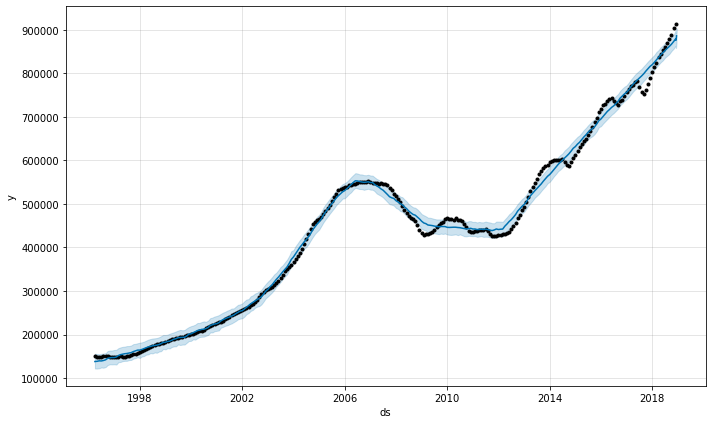

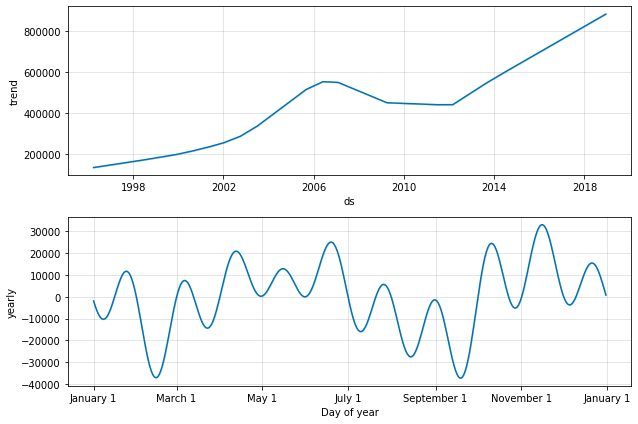

In [46]:
m.plot(forecast)
fig2 = m.plot_components(forecast)

In [0]:
# from fbprophet.plot import plot_plotly
# import plotly.offline as py
# py.init_notebook_mode()

# fig = plot_plotly(m, forecast)  # This returns a plotly Figure
# py.iplot(fig)

In [54]:
len(LA)

274

In [0]:

# def graph_prices_for(df, location_name):
#   df_t = df.loc[:, '1996-04'::].T
#   df_t['avg'] = df_t.mean(numeric_only=True, axis=1)
#   df_t.reset_index(inplace=True)
#   columns = ['index', 'avg']
#   df = pd.DataFrame(df_t, columns = columns)
#   df = df.rename(index=str, columns={"avg": "y", "index": "ds"})
#   ax = df.set_index('ds').plot(figsize=(12, 8))
#   ax.set_ylabel('Home Prices in ' + location_name)
#   ax.set_xlabel('Date')
#   plt.show()

def transform(df, location_name):
  df_t = df.loc[:, '1996-04'::].T
  df_t['avg'] = df_t.mean(numeric_only=True, axis=1)
  df_t.reset_index(inplace=True)
  columns = ['index', 'avg']
  df = pd.DataFrame(df_t, columns = columns)
  df = df.rename(index=str, columns={"avg": "y", "index": "ds"})
  df['place'] = location_name
  return df

# def transform(df):
#   mine = LA[LA.RegionName == 90039]

def do_the_prophit(zip):
  df = LA[LA.RegionName == zip]
  df_t = transform(mine, zip)
  prediction_size = 12
  train_df = df_t[:-prediction_size]
  m = Prophet()
  m.fit(train_df)
  future = m.make_future_dataframe(periods=prediction_size)
  forecast = m.predict(future)
  forecast.head()
  m.plot(forecast)
  fig2 = m.plot_components(forecast)
  return forecast, future


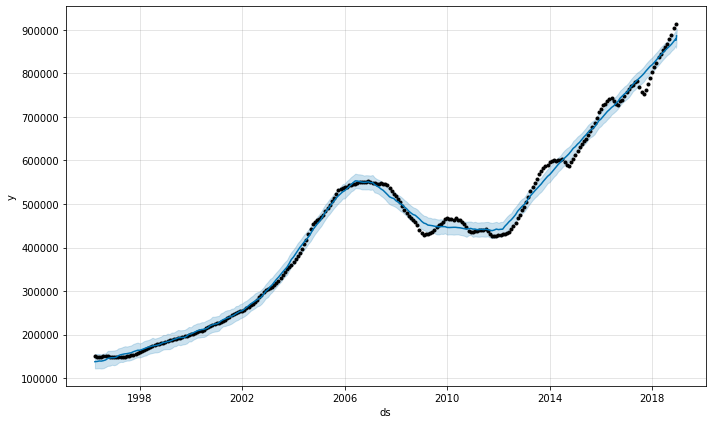

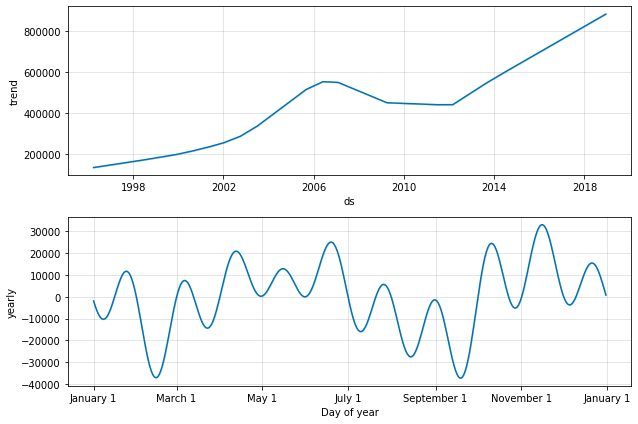

In [74]:
forecast, future = do_the_prophit(90039)

In [65]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,136649.904231,121487.845182,154379.422900,136649.904231,136649.904231,1342.999843,1342.999843,1342.999843,1342.999843,1342.999843,1342.999843,0.0,0.0,0.0,137992.904074
1,1996-05-01,138000.942270,120776.910091,154665.377466,138000.942270,138000.942270,454.221789,454.221789,454.221789,454.221789,454.221789,454.221789,0.0,0.0,0.0,138455.164059
2,1996-06-01,139397.014911,122626.913463,155291.717442,139397.014911,139397.014911,161.879191,161.879191,161.879191,161.879191,161.879191,161.879191,0.0,0.0,0.0,139558.894102
3,1996-07-01,140748.052950,121995.081786,155342.177801,140748.052950,140748.052950,-1452.562451,-1452.562451,-1452.562451,-1452.562451,-1452.562451,-1452.562451,0.0,0.0,0.0,139295.490500
4,1996-08-01,142144.125591,123992.107774,156583.645398,142144.125591,142144.125591,-1767.370827,-1767.370827,-1767.370827,-1767.370827,-1767.370827,-1767.370827,0.0,0.0,0.0,140376.754764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2018-12-09,880168.185655,861814.862661,894887.372844,880168.185655,880168.185655,-1362.761388,-1362.761388,-1362.761388,-1362.761388,-1362.761388,-1362.761388,0.0,0.0,0.0,878805.424267
281,2018-12-10,880340.354410,863098.848360,897531.013086,880340.354410,880340.354410,31.966339,31.966339,31.966339,31.966339,31.966339,31.966339,0.0,0.0,0.0,880372.320749
282,2018-12-11,880512.523166,866550.404802,898657.590156,880512.523166,880512.523166,1647.596388,1647.596388,1647.596388,1647.596388,1647.596388,1647.596388,0.0,0.0,0.0,882160.119554
283,2018-12-12,880684.691921,868117.417790,900383.429107,880684.691921,880684.691921,3419.565580,3419.565580,3419.565580,3419.565580,3419.565580,3419.565580,0.0,0.0,0.0,884104.257501


In [66]:
future

,ds
0,1996-04-01
1,1996-05-01
2,1996-06-01
3,1996-07-01
4,1996-08-01
...,...
280,2018-12-09
281,2018-12-10
282,2018-12-11
283,2018-12-12
